In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print(X_full.shape)
print(Y.shape)

(506, 13)
(506,)


In [12]:
selector = SelectKBest(f_regression, k=1)
print(X_full)
selector.fit(X_full, Y)
print(selector.get_support())
X = X_full[:, selector.get_support()]
print(X.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[False False False False False False False False False False False False
  True]
(506, 1)


In [14]:
def plot_scatter(X,Y, R=None):
    plt.scatter(X, Y, s=32, marker='o', facecolors='blue')
    if R is not None:
        plt.scatter(X,R, color='green', linewidth=0.5)
    plt.show()

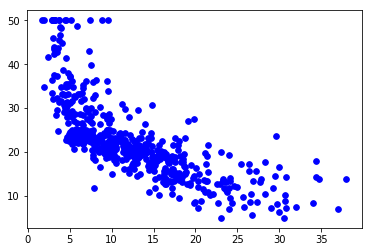

In [15]:
plot_scatter(X, Y)

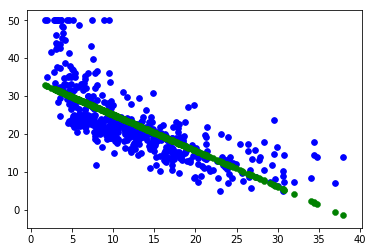

In [16]:
regressor = LinearRegression(normalize=True).fit(X,Y)
plot_scatter(X,Y,regressor.predict(X))

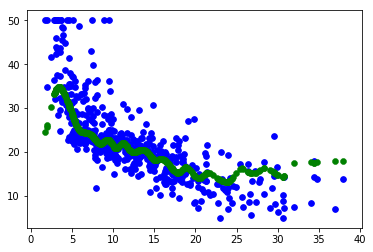

In [17]:
regressor = SVR().fit(X,Y)
plot_scatter(X,Y, regressor.predict(X))

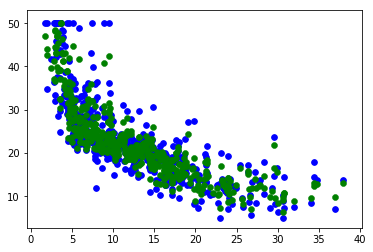

In [18]:
regressor = RandomForestRegressor().fit(X,Y)
plot_scatter(X,Y, regressor.predict(X))